# Обучение без учител - Unsupervised Learning

# Целите днес 

1. Клъстеризация (Clustering): 
- Базирана на разстояние - kMeans 
- Агломеративна клъстеризация (Agglomerative clustering)  
- Базирана на плътност - DBScan
- Оценка на клъстеризация 

2. Намаляване на размерността (Dimensionality reduction)
- PCA (Principal component analysis)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [6]:
# ignore sklearn's convergence warning 
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# 1. Клъстеризация 

# k-Means Clustering

* Алгоритъм за обучение без учител (Unsupervised learning) 
* Разделя данните на `k` сходни групи, наречени клъстери

Да се пробваме с `make_blobs`:

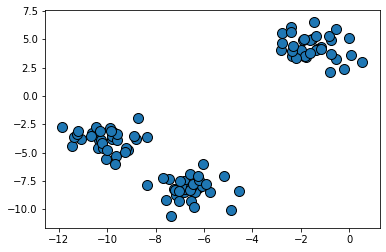

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
mglearn.discrete_scatter(X[:, 0], X[:, 1]);

Така изглежда само `X`, където няма информация за категориите.

In [8]:
X

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

Ще се опитаме да открием нещо такова с k-Means clustering:

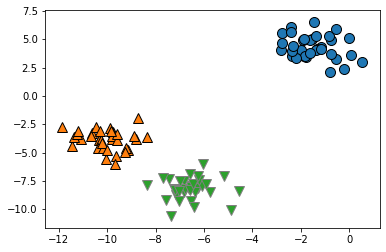

In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);

Кодът би трябвало да изглежда съвсем познато, освен че `fit` не приeма аргумент `y`:

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Да начертаем резултатите:

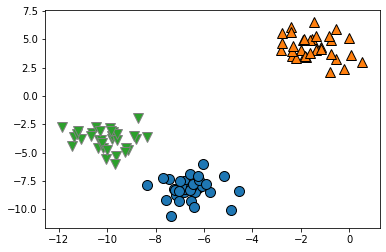

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_pred);

Изглежда сме намерили същите клъстери. Това значи ли, че `y == y_pred`?

In [12]:
y == y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [13]:
print(y)
print(y_pred)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


`y` и `y_pred` създават идентични разделения на данните, но номерацията им е различна.

В sklearn има метрика, която хваща това:

In [15]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y, y_pred)

1.0

`adjusted_rand_score` има повече особености, но ще ги погледнем по-натам.

Как работи k-Means Clustering:

1. Алгоритъма избира $k$ произволни точки, наречени "центрове".
2. Всяка точка от данните се присъединява към клъстера на най-близкия център.
3. След като всички точки се присъединят към даден клъстер, се преизчислява центъра на клъстерите.
4. Стъпки 2-4 се повтарят докато не се получи стабилна позиция.

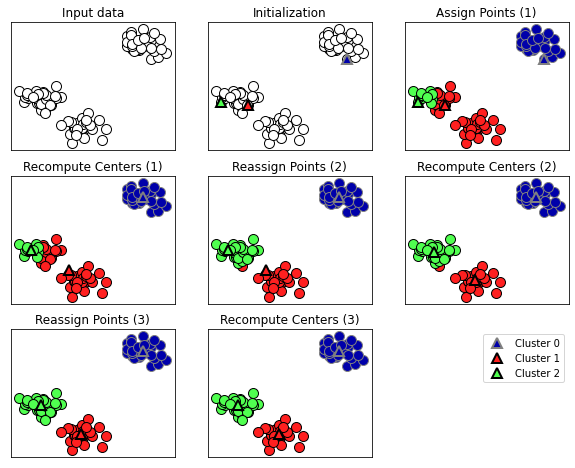

In [16]:
mglearn.plots.plot_kmeans_algorithm()

k-Means открива три центъра и класифицира всяка точка като член на клъстeра на най-близкия център.

In [17]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

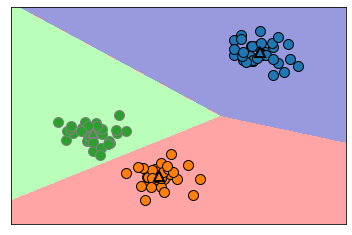

In [18]:
mglearn.plots.plot_kmeans_boundaries()

Един от параметрите на `KMeans` е колко клъстера да намери алгоритъма. Обърнете внимание, че той не знае колко клъстера има в данните.

Това е възможен отговор за `k=2`:

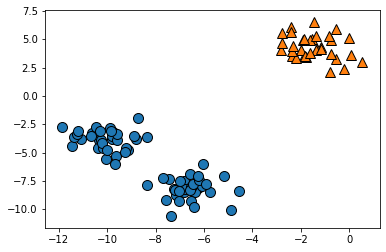

In [19]:
assignments = KMeans(n_clusters=2, random_state=0).fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments);

Това е възможен отговор за `k=5`:

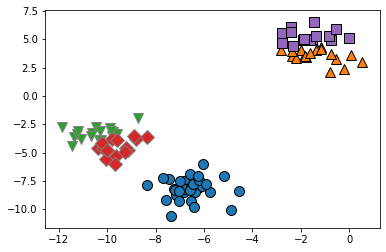

In [20]:
assignments = KMeans(n_clusters=5, random_state=0).fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments);

###  Избор на оптимален параметър k

Избор на оптимален параметър $k$ може да бъде направен чрез "метода на лакътя" - Еlbow method. Методът гласи, че: 
> Броят клъстери трябда да бъде избран така, че добавянето на нов клъстер да не дава много по-добро моделиране на данните. 

Колко добре са модерирани данните може да се измери например чрез сумата от разстоянията (на квадрат) от примерите до центровете на клъстерите, към които принадлежат. Тази информация се намира в атрибутът `inertia_` на обученият kMeans алгоритъм.    
    
Повече за методът можете да прочетете в [страницата в Уикипедия](https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

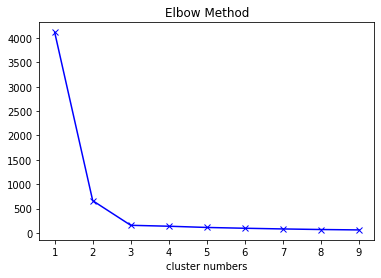

In [21]:
# Elbow method
K = range(1,10)
SSE = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

Един от проблемите на k-Means е, че не може да се справи със всякаква форма на клъстерите. Например:

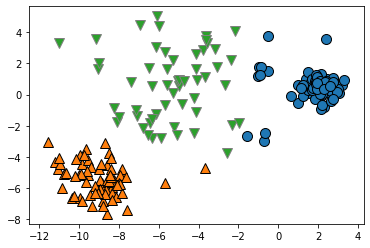

In [22]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred);

Вероятно по-добро разделение щеше да бъде гъстите региони бяха два от клъстерите и всичко между тях беше третия.

Ето и друг пример:

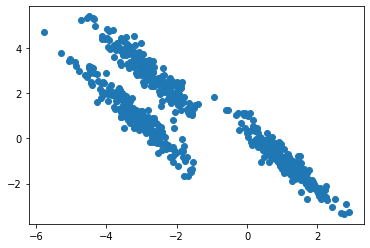

In [23]:
X, y = make_blobs(random_state=170, n_samples=600)
random = np.random.RandomState(74)
transformation = random.normal(size=(2, 2))
X = np.dot(X, transformation)

plt.scatter(X[:, 0], X[:, 1]);

Тук ясно се виждат три отделни клъстера. Но какво ли ще намери k-Means?

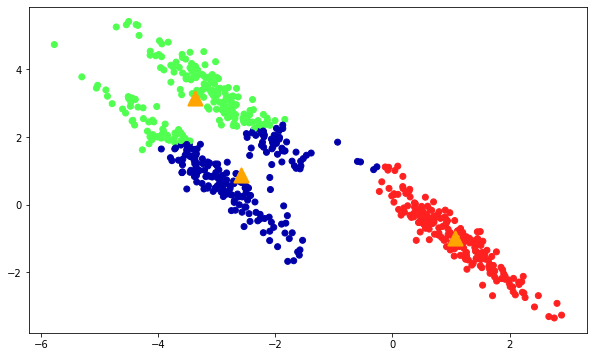

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='orange', s=200, linewidth=2);

Друго, с което k-Means няма да се справи добре е `make_moons`:

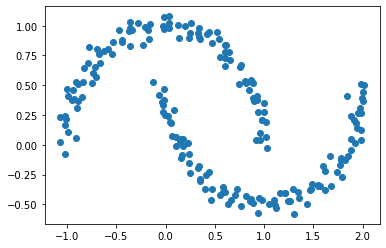

In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

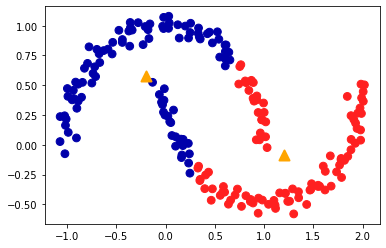

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='orange', s=100, linewidth=2);

# Agglomerative Clustering

Как работи:

1. Декларира всяка точка в отделен клъстър
2. Събира двата най-близки клъстера в един
3. Повтаря стъпка две докато не останат $k$ клъстера

Какво значи "най-близки" клъстери се контролира от параметри.

Повече детайли в [документацията](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

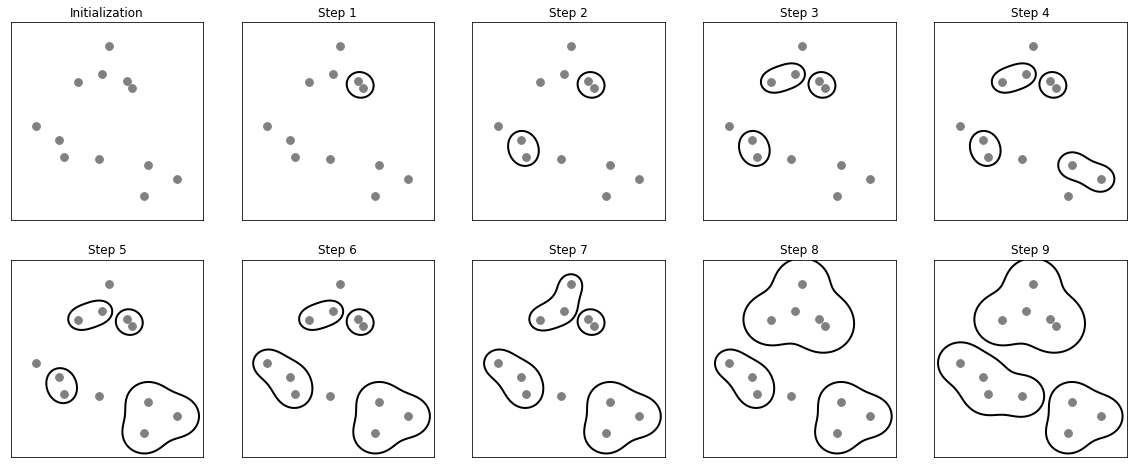

In [27]:
mglearn.plots.plot_agglomerative_algorithm()

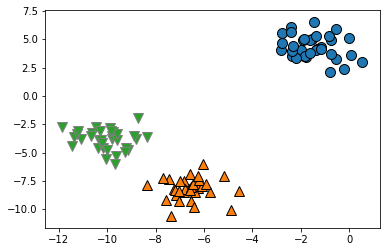

In [28]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
clustering = AgglomerativeClustering(n_clusters=3)
assignment = clustering.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment);

Този алгоритъм също не се оправя добре с `make_moons`:

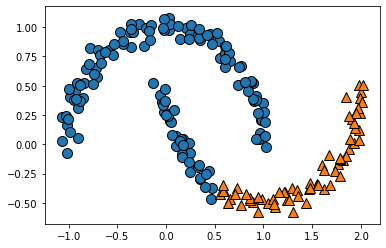

In [29]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

clustering = AgglomerativeClustering(n_clusters=2)
assignment = clustering.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment);

Поради начина си на работа, [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) няма `predict` – той не може да генерализира за нови точки. Има само `fit` и `fit_predict`.

# DBSCAN

* Идва от "Density-Based Spatial Clustering of Applications with Noise"
* Шокиращо, нали?
* Няма нужда да му давате брой клъстери
* Определя някои точки като шум и не ги начислява в клъстър
* Може да открива всякакви форми
* По-бавен

## Как работи?

* Причислява точките в три категории – вътрешни примери ("core sample"), точки по околността ("boundary points") и шум ("noise").
* Два основни параметъра – `eps` и `min_samples`.
* Гранични точки са точки, които са на `eps` разстоянието от вътрешните (core samples), но не са core samples.
* Шум е всичко останало. 

Повече детайли [в документацията](http://scikit-learn.org/stable/modules/clustering.html#dbscan).

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


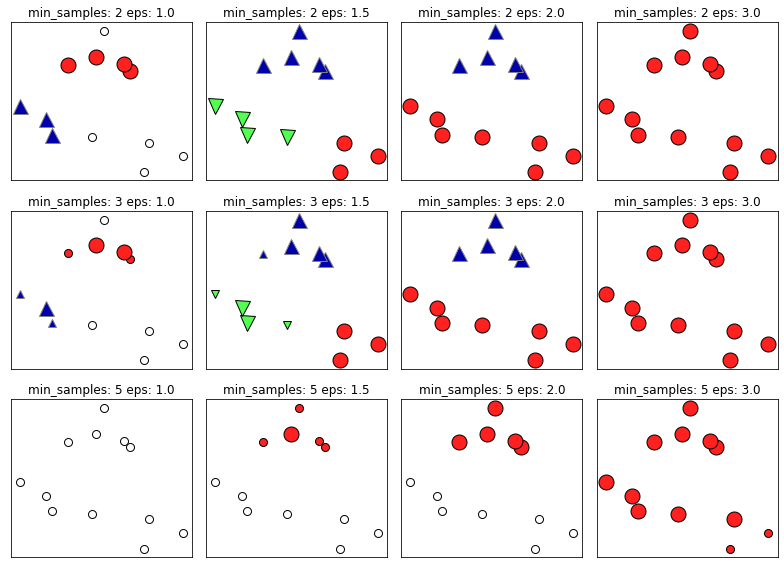

In [31]:
mglearn.plots.plot_dbscan()

DBSCAN вече може да се справи с `make_moons`:

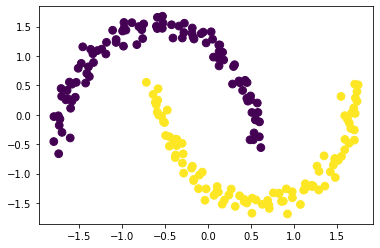

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60);

С подходящия `eps`, DBSCAN може да се справи и онези странни три клъстера от по-рано:

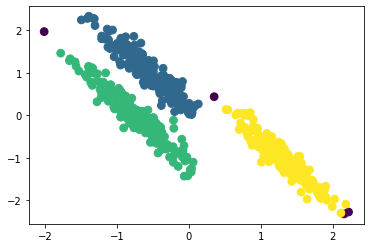

In [34]:
X, y = make_blobs(random_state=170, n_samples=600)
random = np.random.RandomState(74)
transformation = random.normal(size=(2, 2))
X = np.dot(X, transformation)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.20)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60);

Обърнете внимание, че подобно на `AgglomerativeClustering`, `DBSCAN` има само `fit_predict`.

# Оценяване на клъстеризация

Погледнахме за момент [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html). Нека видим какво прави:

In [35]:
from sklearn.metrics.cluster import adjusted_rand_score

Ще пробваме пак с `make_moons`:

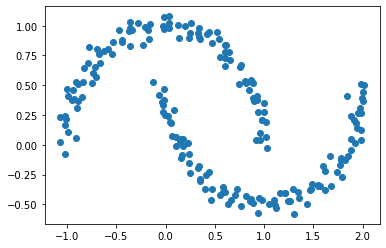

In [36]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.scatter(X[:, 0], X[:, 1]);

Ще видим оценката на тези три алгоритъма:

In [37]:
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

Ще генерираме `random_clusters`, който раздава произволен клъстeр на всяка точка:

In [39]:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
random_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

И да начертаем диаграма:

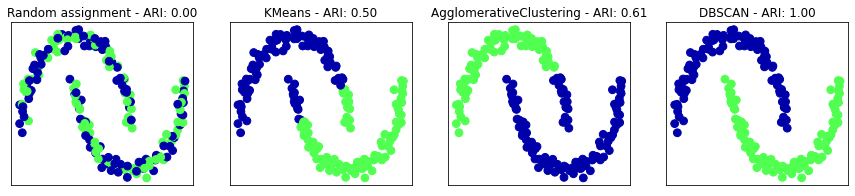

In [40]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

## Сравнение на различните видове клъстеризация 

В документацията на модула sklearn има много добро визуално сравнение на резултатите от различните видове клъстеризация при различни форми на клъстерите, както и обяснение в кои случаи кой алгоритъм е най-подходящ. 

https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

## Въпроси? 

# 2. Намаляване на размерността 

# Principal Component Analysis
* Или накратко, [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* Опитва се да намали броя измерения на характеристиките.
* Завърта данните по начин, в който да намери по-малкомерен линеен базис, който да запазва повечето информация.
- Повече информация - в [документацията](https://scikit-learn.org/stable/modules/decomposition.html#pca).

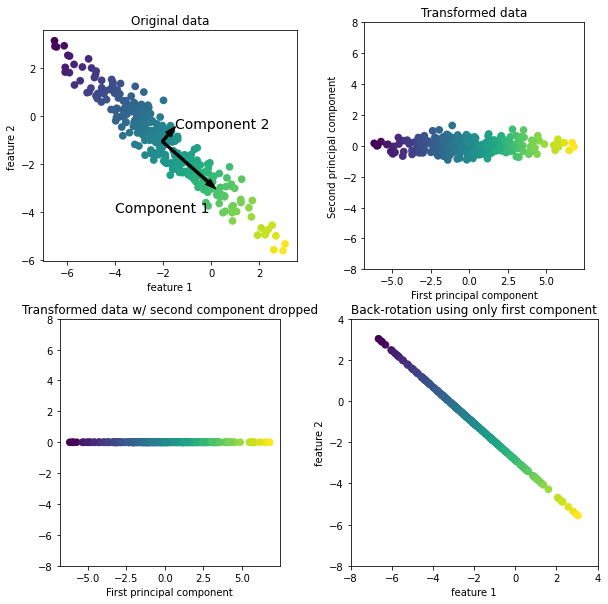

In [41]:
mglearn.plots.plot_pca_illustration()

Бихме могли да го ползваме за визуализация.

Да се опитаме да го приложим върху `cancer`. Първо, нека да видим какви характеристики има:

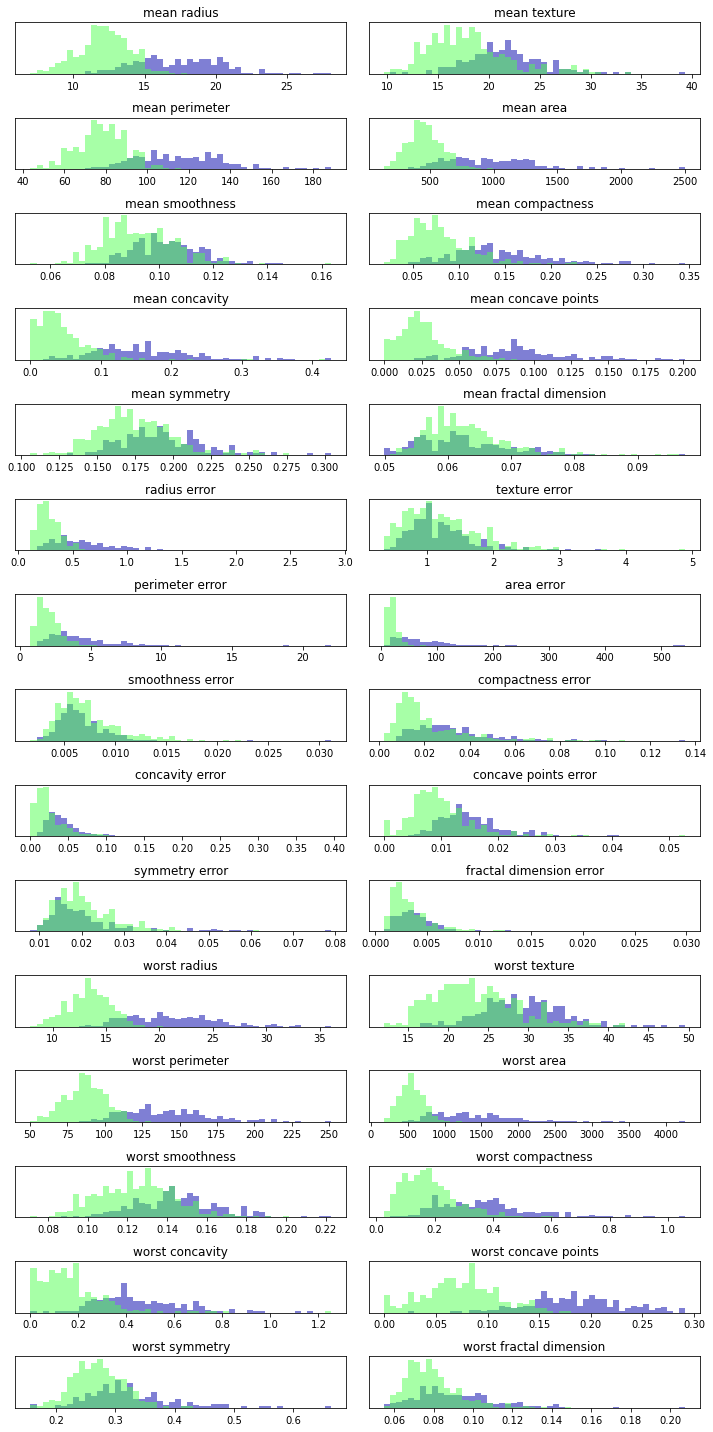

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
fig.tight_layout()

In [44]:
cancer.data.shape

(569, 30)

Преди да го прекараме през PCA е добре да мине през `StandardScaler`:

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

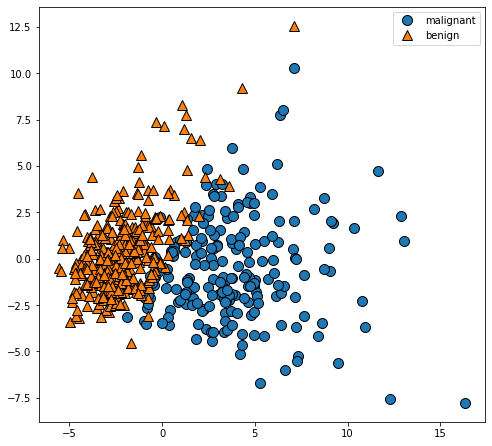

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal');

In [47]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

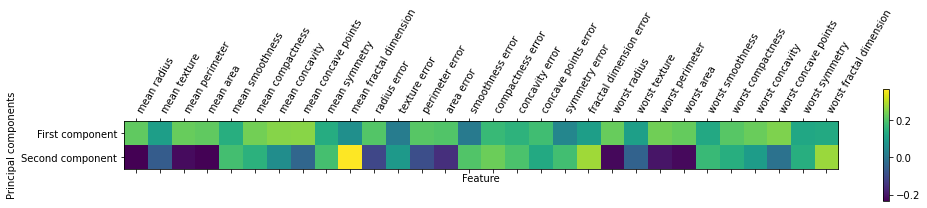

In [32]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

###  Как броят компоненти влияе на представянето на алгоритъма?


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

X, y = cancer.data, cancer.target

pipeline = make_pipeline(StandardScaler(), LinearSVC(C=0.01))

cross_val_score(pipeline, X, y).mean()

0.9789163173420278

In [49]:
for i in range(1, 10):
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=i), LinearSVC(C=0.01))
    score = cross_val_score(pipeline, X, y).mean()
    print("Score for {} components: {}".format(i, score))

Score for 1 components: 0.9139264089427108
Score for 2 components: 0.9508461419034312
Score for 3 components: 0.9455519329296692
Score for 4 components: 0.9666511411271541
Score for 5 components: 0.968390001552554
Score for 6 components: 0.9719142990218911
Score for 7 components: 0.9701443875174662
Score for 8 components: 0.9824406148113647
Score for 9 components: 0.9806862288464524


# Допълнително: Non-negative matrix factorization

Друг алгоритъм, полезен за декомпозиране:

* Работи само с позитивни числа.
* Подходящ където резултатите са сбор от независими променливи (напр. много хора говорещи в една стая).
* Понякога се интерпретира по-лесно от PCA.

Повече информация [в документацията](http://scikit-learn.org/stable/modules/decomposition.html#nmf).

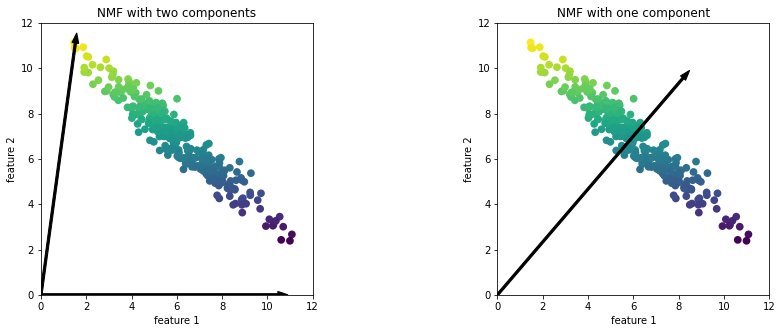

In [46]:
mglearn.plots.plot_nmf_illustration()

### Пример

Декомпозиране на сигнал.

* Имате трима човека, говорещи едновременно в една стая.
* Има n микрофона из стаята, които записват всичко.
* Всеки е на различно място и записва източниците с различна сила.

Може да ползваме NMF да извлечем оригиналните сигнали.

Да генерираме три сигнала:

(2000, 3)

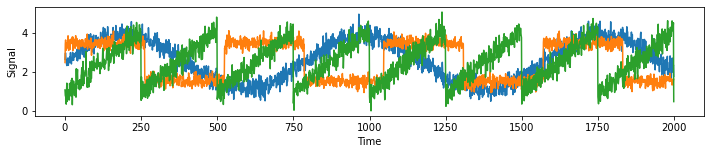

In [47]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(12, 2))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal");
S.shape

Сега ще ги прекараме през 100 микрофона, всеки от които на произволна дистанция от всеки човек:

In [48]:
m = np.random.RandomState(0).uniform(size=(100, 3))
print(m.shape)
m[:5]

(100, 3)


array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606]])

Това е матрица, където редовете са микрофони, а колоните са дистанцията от всеки микрофон.

Извеждаме 100 записа:

In [49]:
X = np.dot(S, m.T)
X.shape

(2000, 100)

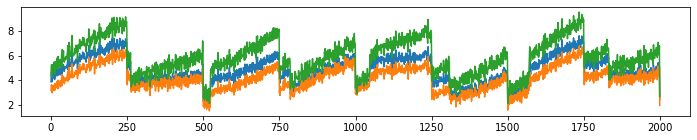

In [50]:
plt.figure(figsize=(12, 2))
plt.plot(X[:, :3], '-');

In [51]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf.fit_transform(X).shape

(2000, 3)

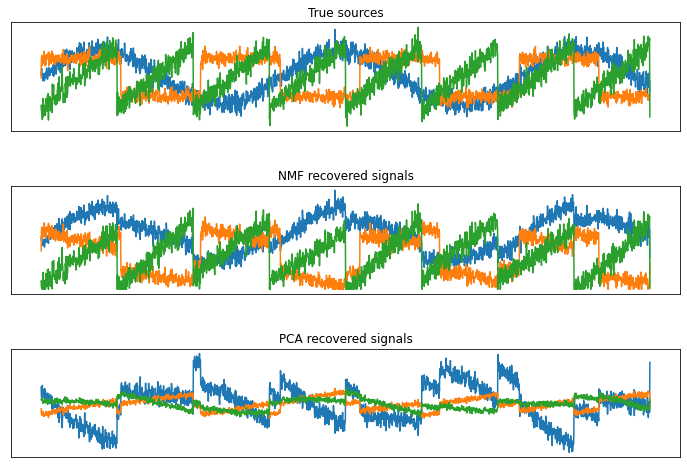

In [52]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [S, S_, H]
names = ['True sources',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(3, figsize=(12, 8), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

# Визуализация в клъстерите на digits

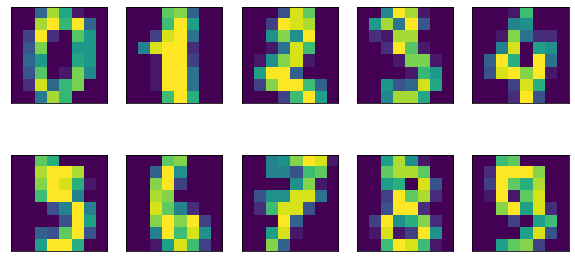

In [53]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Може да пробваме с PCA:

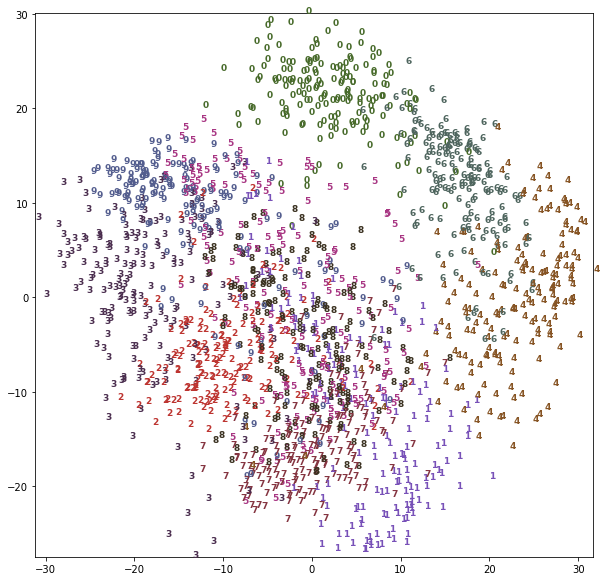

In [54]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

Въпреки, че има забележими клъстери от някои числа, `PCA` не се справя идеално.

Може да пробваме и един друг метод, в който няма да навлизаме - TSNE.

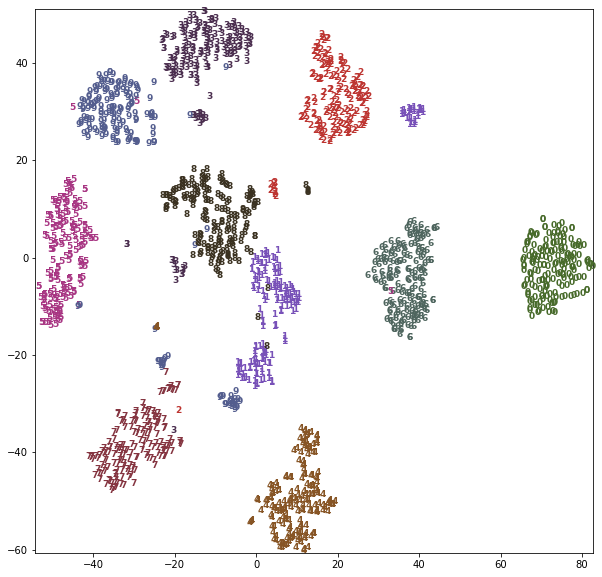

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

## Въпроси? 